In [1]:
# @title Load and Prep data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import plot_model

# Load the data
# Assuming 'data' is the DataFrame containing your dataset
# Replace 'data.csv' with the actual file name or path if you're loading from a file
data = pd.read_csv('SampleDataSet.csv')

# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Handle categorical variables
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Card Type'] = le.fit_transform(data['Card Type'])

# Handle missing values if any
data = data.dropna()

# Split the data into features and labels
X = data.drop('Exited', axis=1)
y = data['Exited']

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# @title All Models
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense, GRU

# Model 1
model1 = Sequential()
model1.add(SimpleRNN(50, input_shape=(X_train.shape[1], 1)))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model1.fit(X_train, y_train, epochs=10, batch_size=32)

# Model 2
model2 = Sequential()
model2.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model2.fit(X_train, y_train, epochs=10, batch_size=32)

# Model 3
model3 = Sequential()
model3.add(GRU(50, input_shape=(X_train.shape[1], 1)))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#model3.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
25/25 [==============================] - 5s 15ms/step - loss: 1.1189 - accuracy: 0.1625
Epoch 2/10
25/25 [==============================] - 0s 15ms/step - loss: 0.7420 - accuracy: 0.4137
Epoch 3/10
25/25 [==============================] - 0s 15ms/step - loss: 0.6368 - accuracy: 0.6463
Epoch 4/10
25/25 [==============================] - 0s 15ms/step - loss: 0.5847 - accuracy: 0.7450
Epoch 5/10
25/25 [==============================] - 0s 12ms/step - loss: 0.5176 - accuracy: 0.7837
Epoch 6/10
25/25 [==============================] - 0s 12ms/step - loss: 0.4993 - accuracy: 0.8000
Epoch 7/10
25/25 [==============================] - 1s 22ms/step - loss: 0.5008 - accuracy: 0.8000
Epoch 8/10
25/25 [==============================] - 1s 21ms/step - loss: 0.4994 - accuracy: 0.8000
Epoch 9/10
25/25 [==============================] - 1s 21ms/step - loss: 0.4924 - accuracy: 0.8000
Epoch 10/10
25/25 [==============================] - 1s 22ms/step - loss: 0.4919 - accuracy: 0.8000
Model: "m

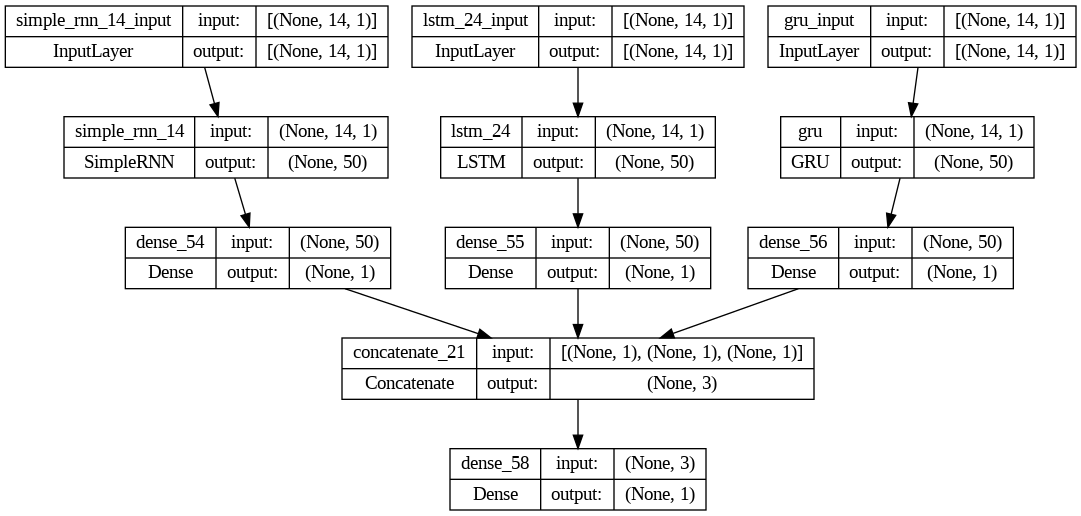

In [77]:
# @title Merge models in to concentrate and output with a dense
from keras.models import Model
from keras.layers import concatenate
# Merge models
merged_model = concatenate([model1.output, model2.output, model3.output])

# Add a final layer for classification
merged_model = Dense(1, activation='sigmoid')(merged_model)

# Create and compile the merged model
final_model = Model(inputs=[model1.input, model2.input, model3.input], outputs=merged_model)
final_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the merged model with 3 inputs
final_model.fit([X_train, X_train, X_train], y_train, epochs=10, batch_size=32)

final_model.summary()
plot_model(
    final_model,
    show_shapes=True
)

In [78]:
# Evaluate the model with 3 inputs
loss, accuracy = final_model.evaluate([X_test, X_test, X_test], y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

7/7 [==============================] - 1s 6ms/step - loss: 0.5324 - accuracy: 0.7800
Accuracy: 78.00%
